In [1]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def unmap_pred(pred):
    img = np.zeros((512, 512, 3), dtype=np.uint8)

    img[pred == 0] = [0, 0, 0]
    img[pred == 1] = [255, 0, 0]
    img[pred == 2] = [0, 255, 0]
    img[pred == 3] = [0, 0, 255]

    return img

In [3]:
inference_dir = os.path.join("..", "assets", "inference")
table_dir = os.path.join(inference_dir, "06-15-2024-13:00")

df = pd.read_parquet(table_dir)
df["prediction"] = df["prediction"].map(lambda x: x.reshape((512, 512)))
df["prediction"] = df["prediction"].map(unmap_pred)

df.head()

,img_name,loss,miou,prediction
0,ID00322637202284842245491_52.jpg,0.024800,0.927972,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,ID00105637202208831864134_15.jpg,0.004449,0.994840,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,ID00331637202286306023714_26.jpg,0.008182,0.925797,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,ID00323637202285211956970_105.jpg,0.007486,0.957270,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,ID00426637202313170790466_123.jpg,0.022175,0.587606,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [4]:
# test
row = df.iloc[0]
img_name = row["img_name"]
pred = row["prediction"]

img_dir = os.path.join("..", "data", "test", "images", img_name)
mask_dir = os.path.join("..", "data", "test", "masks", img_name)

img = Image.open(img_dir).convert("L")
mask = Image.open(mask_dir).convert("RGB")

In [5]:
preds = df["prediction"].tolist()

img_paths = df["img_name"].map(lambda img_name: os.path.join("..", "data", "test", "images", img_name)).tolist()
mask_paths = df["img_name"].map(lambda img_name: os.path.join("..", "data", "test", "masks", img_name)).tolist()

imgs = [Image.open(img).convert("RGB") for img in img_paths]
masks = [Image.open(img).convert("RGB") for img in mask_paths]

Generating Predictions:   0%|          | 0/10 [00:00<?, ?it/s]

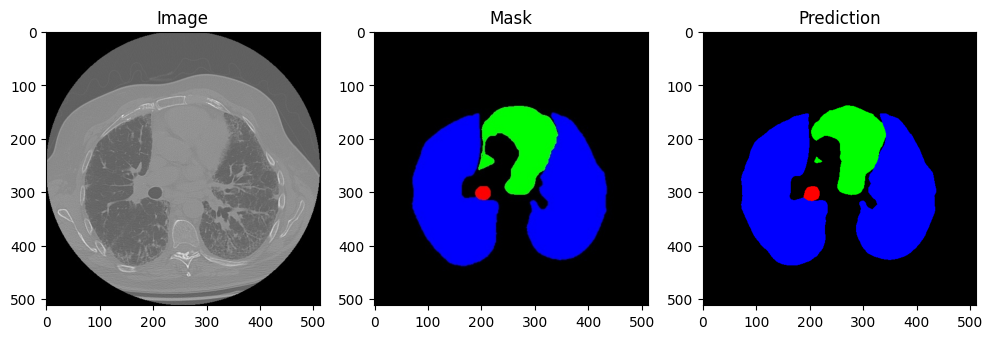

Generating Predictions:  10%|█         | 1/10 [00:00<00:02,  3.37it/s]

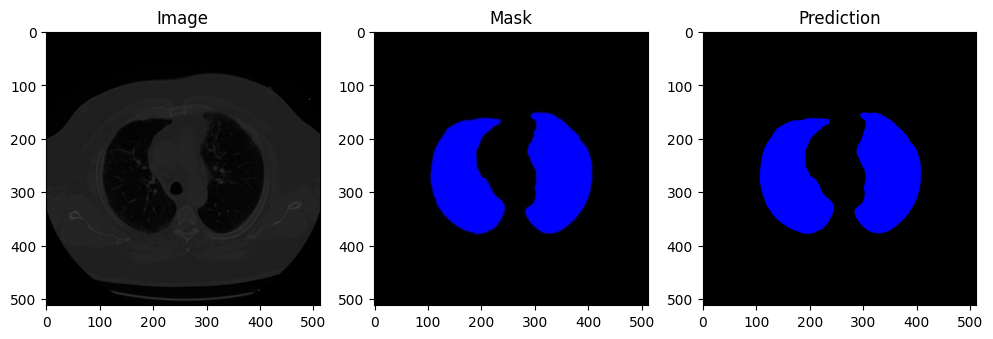

Generating Predictions:  20%|██        | 2/10 [00:00<00:01,  4.25it/s]

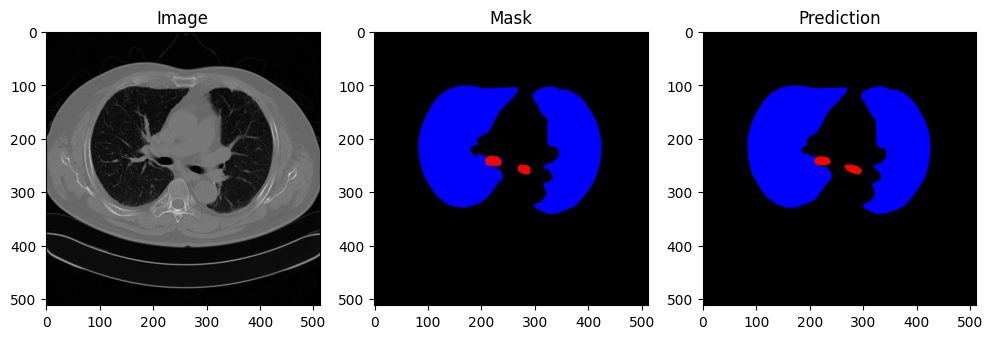

Generating Predictions:  30%|███       | 3/10 [00:00<00:01,  4.67it/s]

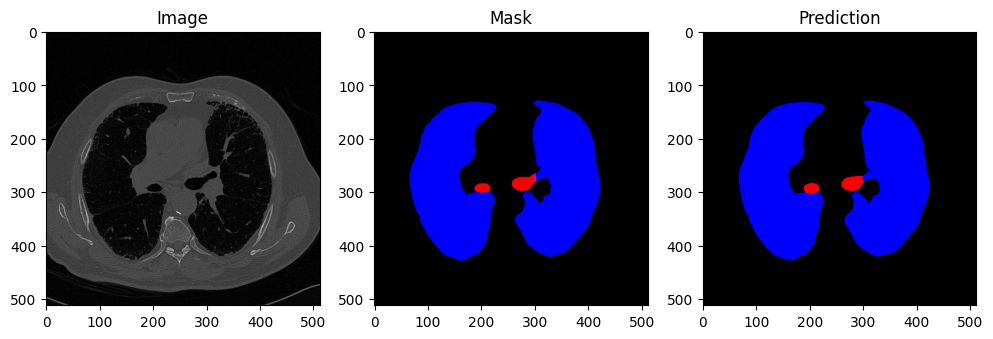

Generating Predictions:  40%|████      | 4/10 [00:00<00:01,  4.86it/s]

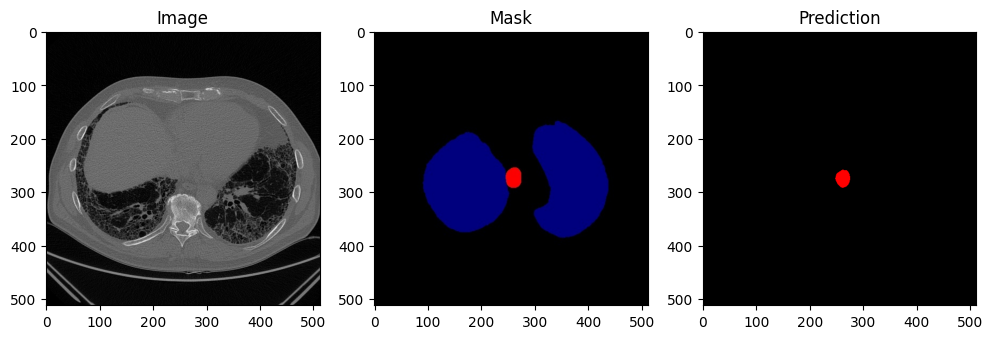

Generating Predictions:  50%|█████     | 5/10 [00:01<00:00,  5.02it/s]

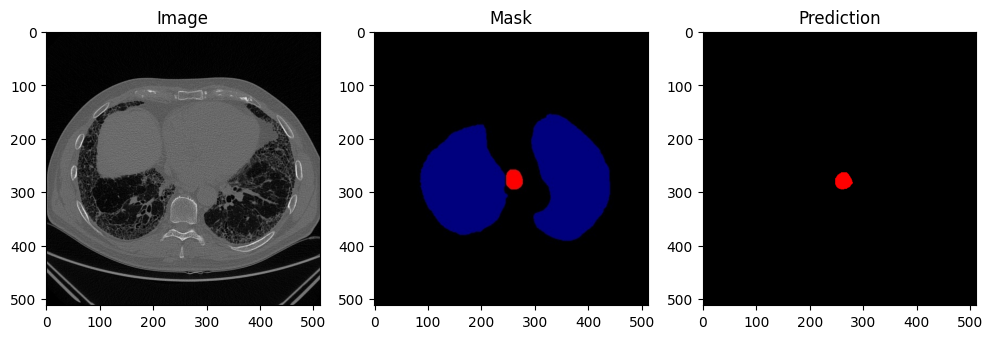

Generating Predictions:  60%|██████    | 6/10 [00:01<00:00,  5.12it/s]

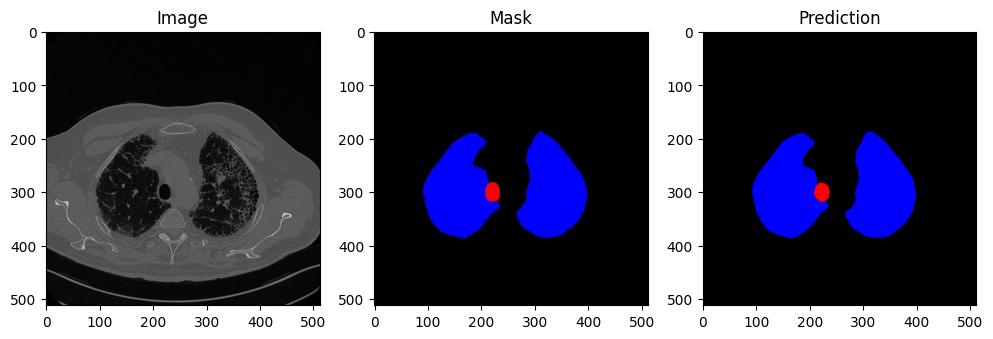

Generating Predictions:  70%|███████   | 7/10 [00:01<00:00,  5.18it/s]

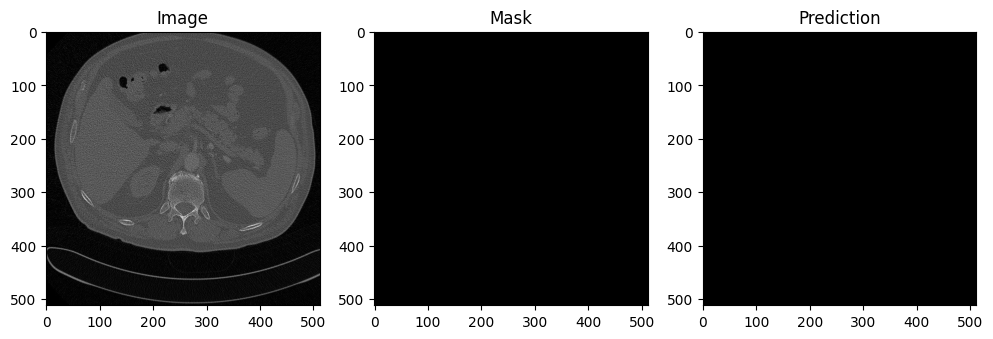

Generating Predictions:  80%|████████  | 8/10 [00:01<00:00,  4.92it/s]

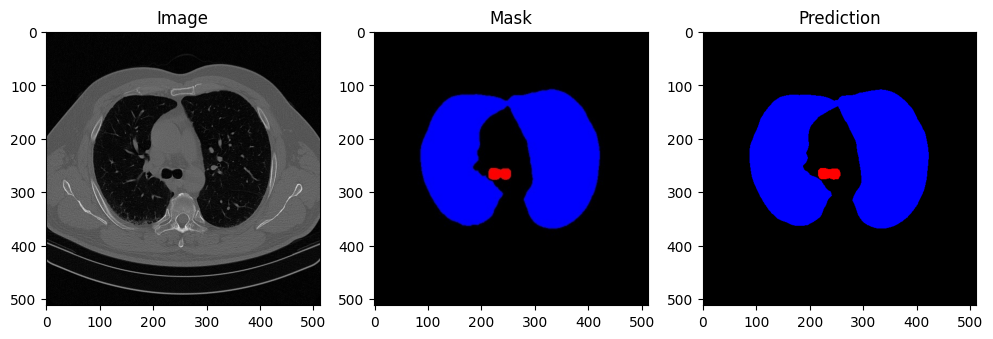

Generating Predictions:  90%|█████████ | 9/10 [00:01<00:00,  5.02it/s]

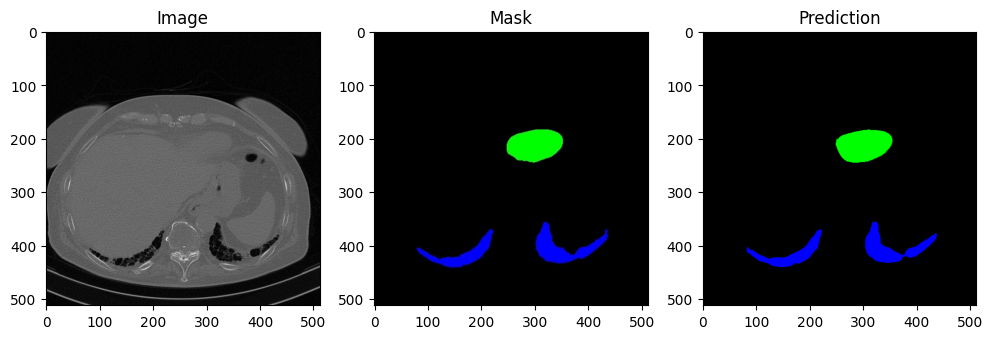

Generating Predictions: 100%|██████████| 10/10 [00:02<00:00,  4.91it/s]


In [6]:
for i in tqdm(range(len(preds[:10])), desc="Generating Predictions"):

    img = imgs[i]
    mask = masks[i]
    pred = preds[i]

    fig, axes = plt.subplots(1, 3, figsize=(4*3, 4))

    axes[0].imshow(img, cmap="gray")
    axes[0].set_title("Image")

    axes[1].imshow(mask)
    axes[1].set_title("Mask")

    axes[2].imshow(pred)
    axes[2].set_title("Prediction")

    plt.show()

plt.close('all')